### Vertebral Column Data Set Analysis

In my exploration, I've delved into a biomedical dataset curated by Dr. Henrique da Mota during his medical residency in Lyon, France. This dataset intricately captures each patient's essence through six biomechanical attributes derived from the pelvis and lumbar spine: pelvic incidence, pelvic tilt, lumbar lordosis angle, sacral slope, pelvic radius, and the grade of spondylolisthesis, precisely in that order.

My main focus revolves around the classification aspect, where patients are labeled as DH (Disk Hernia), Spondylolisthesis (SL), Normal (NO), or Abnormal (AB) following a specific convention. For the purpose of my project, I'm honing in on a binary classification task, distinctly designating NO as 0 and AB as 1. This endeavor aims to uncover patterns and insights within this biomedical data, contributing to a deeper understanding of the subject matter.

(a) Download the Vertebral Column Data Set from: https://archive.ics.uci. edu/ml/datasets/Vertebral+Column.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.covariance import EmpiricalCovariance

In [2]:
column_data = pd.read_csv('/Users/leyunlin/Documents/GitHub/homework-1-LeyunLin/data/vertebral_column_data/column_2C.dat', sep=' ', header=None, names=["pelvic_incidence", "pelvic_tilt", "lumbar_lordosis_angle", "sacral_slope", "pelvic_radius", "grade_spondylolisthesis", "class"])
column_data

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,grade_spondylolisthesis,class
0,63.03,22.55,39.61,40.48,98.67,-0.25,AB
1,39.06,10.06,25.02,29.00,114.41,4.56,AB
2,68.83,22.22,50.09,46.61,105.99,-3.53,AB
3,69.30,24.65,44.31,44.64,101.87,11.21,AB
4,49.71,9.65,28.32,40.06,108.17,7.92,AB
...,...,...,...,...,...,...,...
305,47.90,13.62,36.00,34.29,117.45,-4.25,NO
306,53.94,20.72,29.22,33.22,114.37,-0.42,NO
307,61.45,22.69,46.17,38.75,125.67,-2.71,NO
308,45.25,8.69,41.58,36.56,118.55,0.21,NO


(b) Pre-Processing and Exploratory data analysis:

i. Immersing into the data, I've crafted scatterplots for the independent variables, employing color to distinguish between Classes 0 and 1. This visual representation provides insights into the distribution and potential patterns within the dataset.

ii. To further unveil the nuances, I've generated boxplots for each independent variable, utilizing color to highlight distinctions between Classes 0 and 1, drawing inspiration from ISLR page 129. These boxplots offer a comprehensive view of the distribution and central tendencies of the data, aiding in identifying potential outliers or trends.

iii. For the purpose of training and testing, a strategic approach was employed. The initial 70 rows of Class 0 and the first 140 rows of Class 1 have been selectively chosen as the training set, ensuring a balanced representation. The remaining data is earmarked for the test set, fostering a robust evaluation of the model's performance on unseen data. This partitioning strategy contributes to the model's generalization capability and enhances its predictive accuracy.

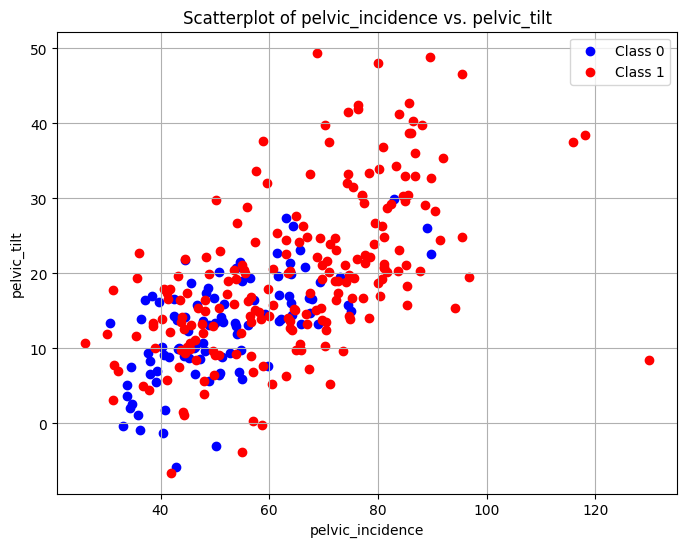

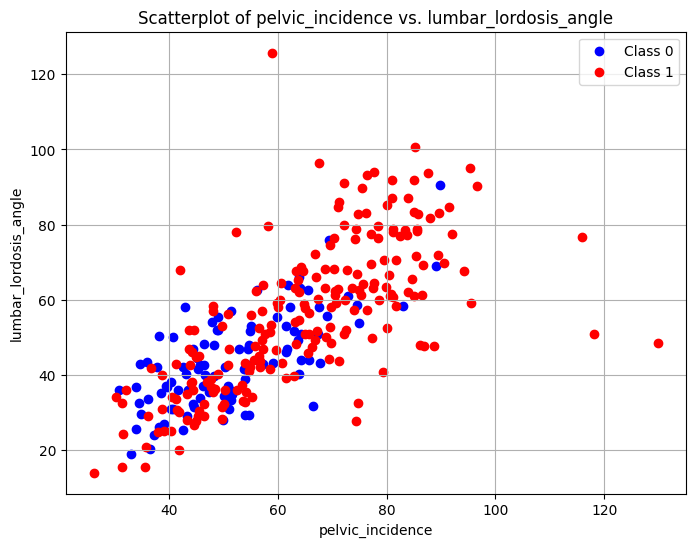

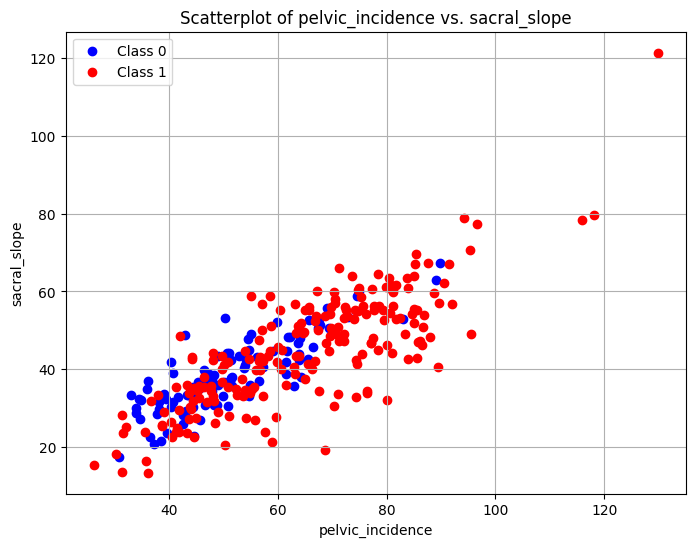

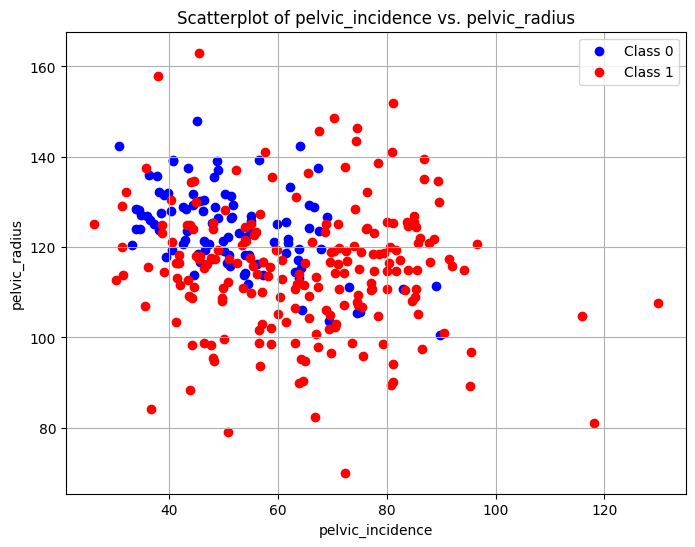

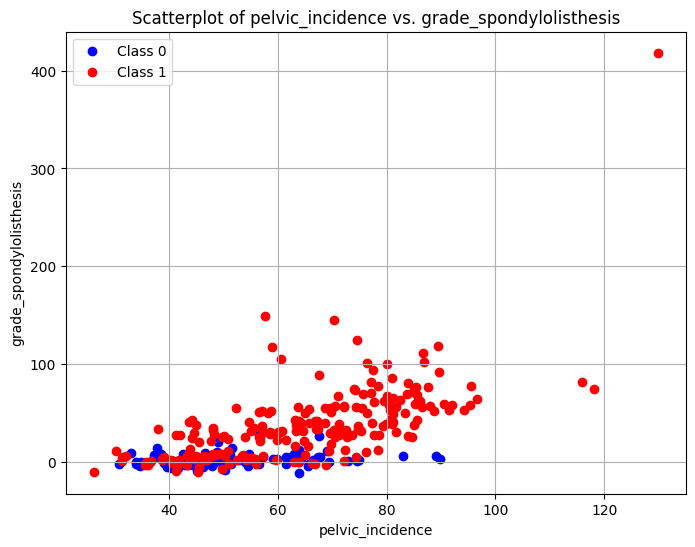

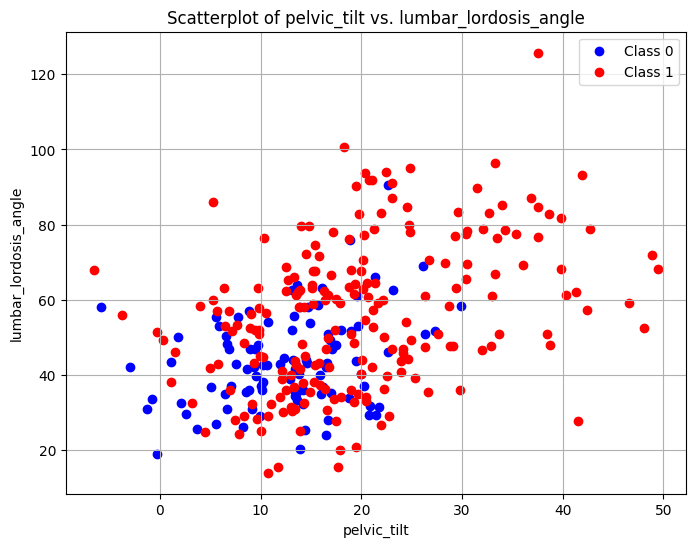

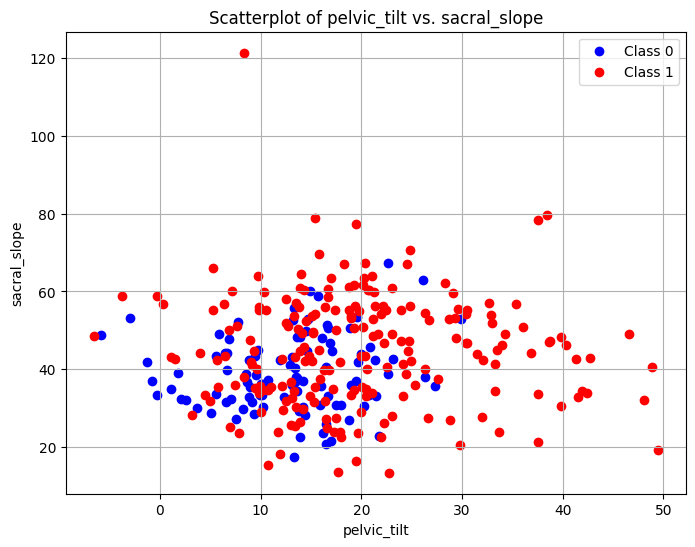

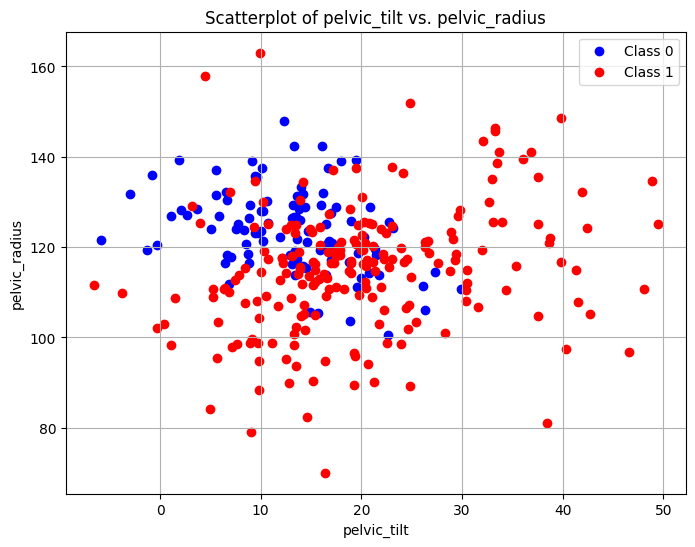

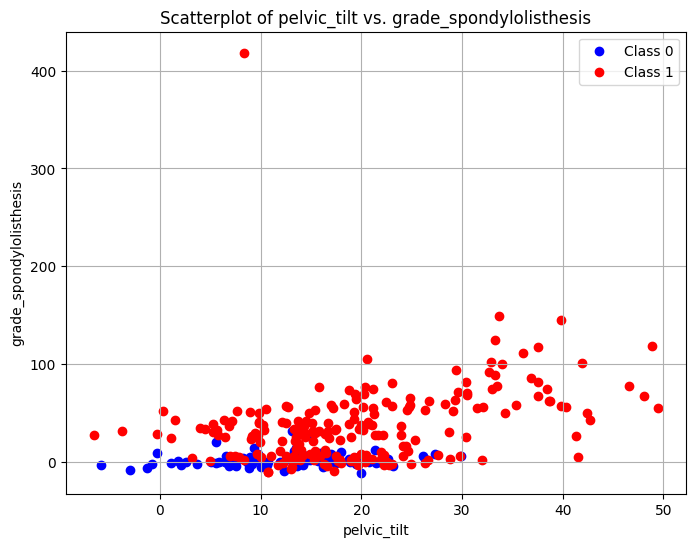

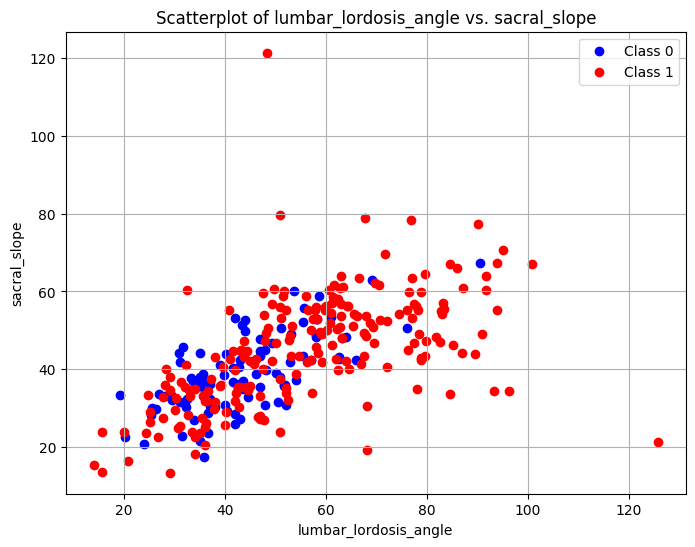

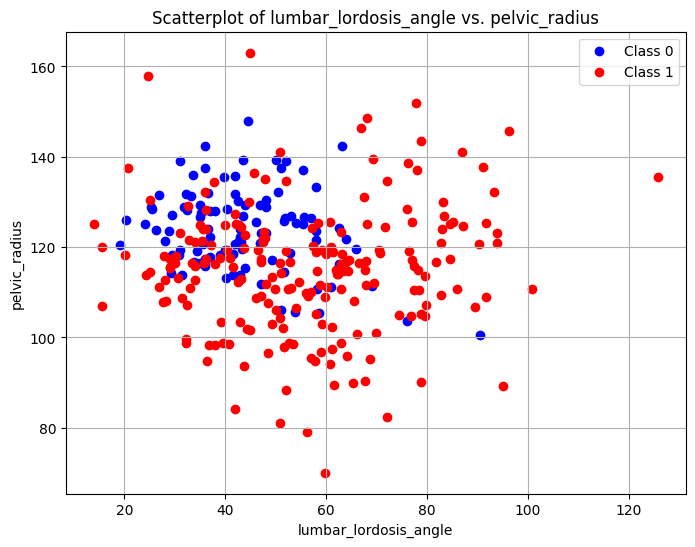

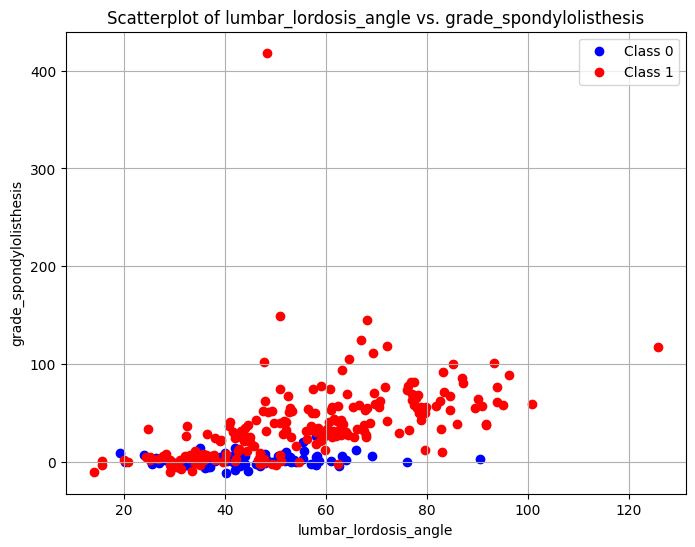

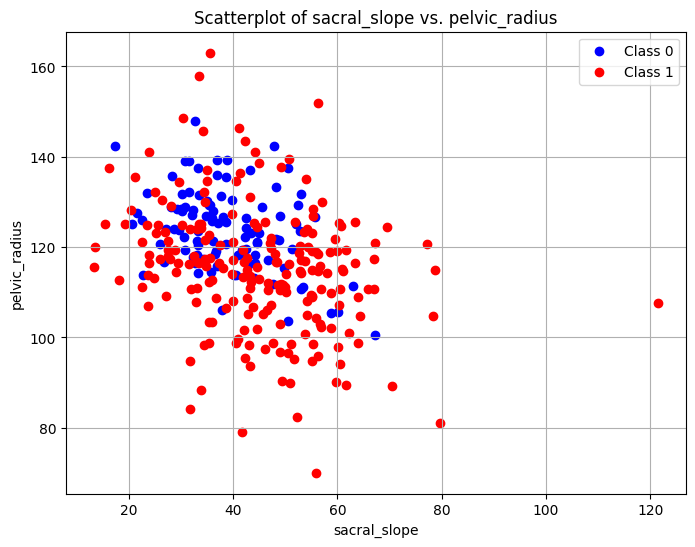

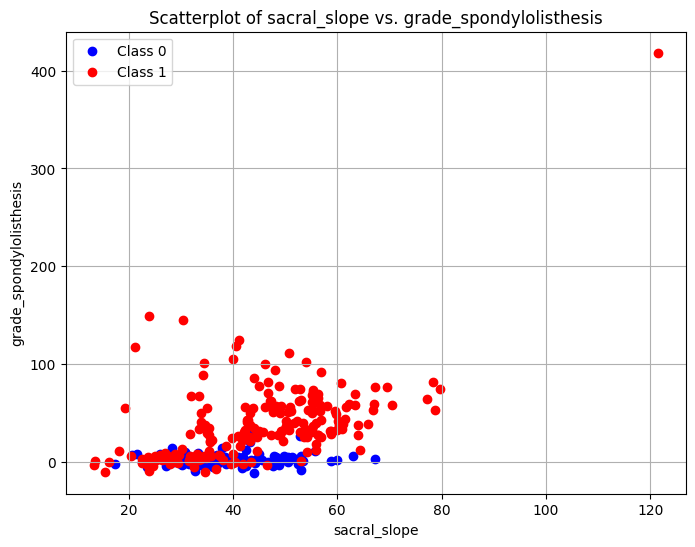

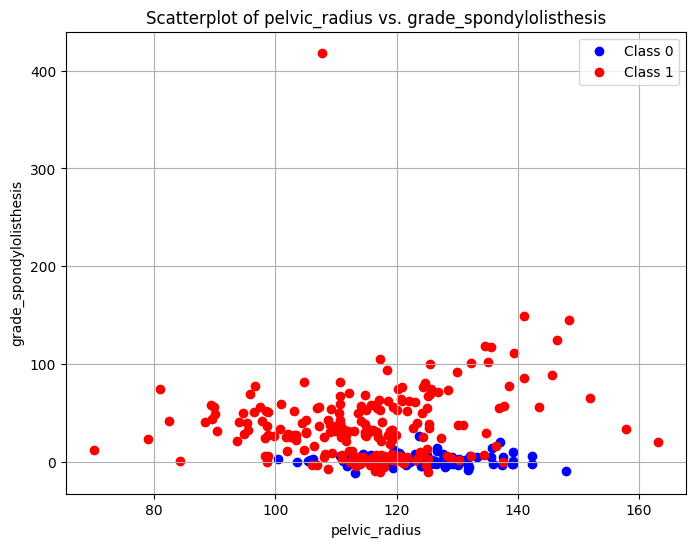

In [3]:
column_data['class'] = column_data['class'].map({'NO': 0, 'AB': 1})
class_0 = column_data[column_data['class'] == 0]
class_1 = column_data[column_data['class'] == 1]
independent_variables = ["pelvic_incidence", "pelvic_tilt", "lumbar_lordosis_angle", "sacral_slope", "pelvic_radius", "grade_spondylolisthesis"]
iv=independent_variables
for i in range(len(iv)):
    for j in range(i + 1, len(iv)):
        plt.figure(figsize=(8, 6))
        plt.scatter(class_0[iv[i]], class_0[iv[j]], c='b', label='Class 0')
        plt.scatter(class_1[iv[i]], class_1[iv[j]], c='r', label='Class 1')
        plt.xlabel(iv[i])
        plt.ylabel(iv[j])
        plt.title(f'Scatterplot of {iv[i]} vs. {iv[j]}')
        plt.grid()
        plt.legend()
        plt.show()

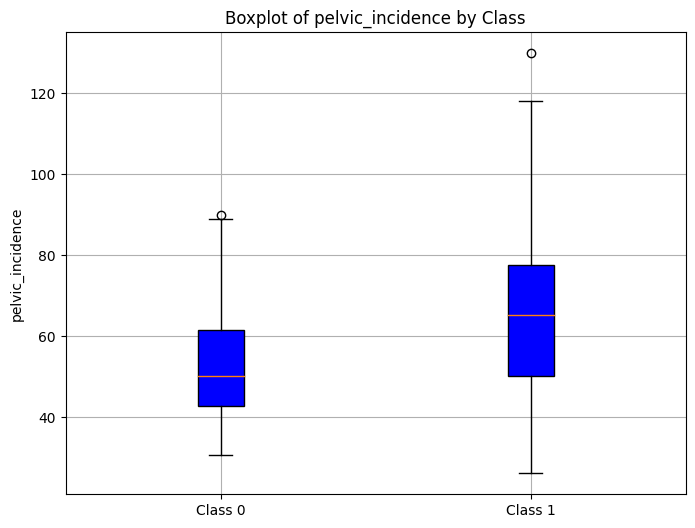

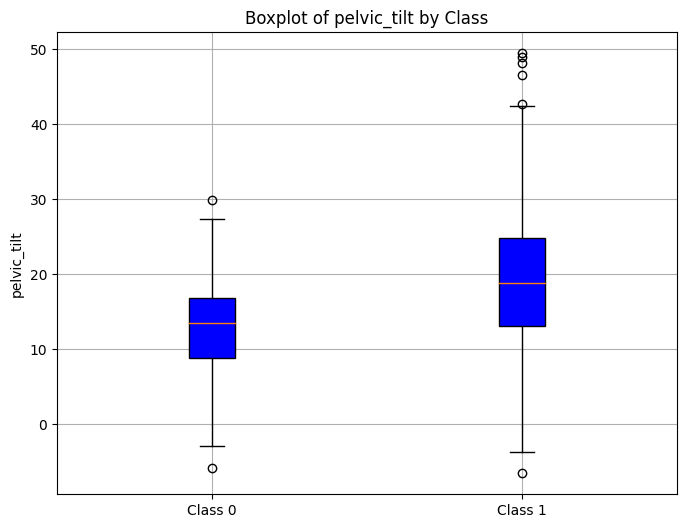

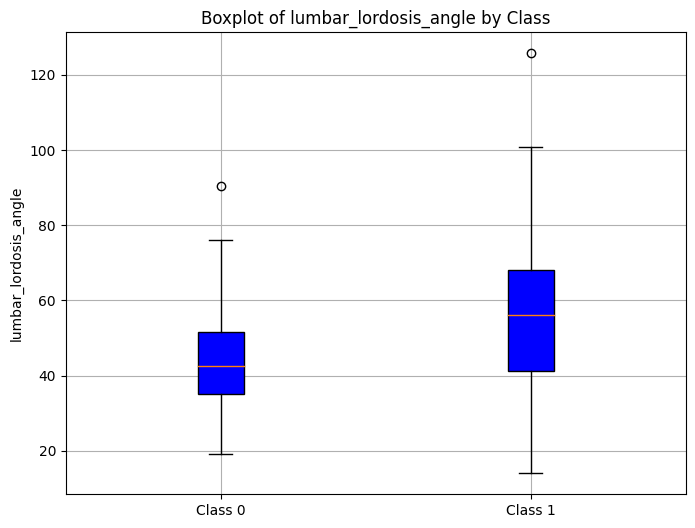

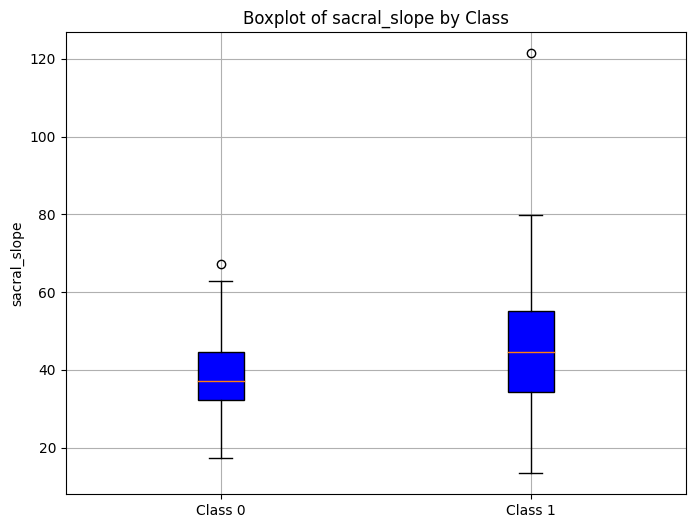

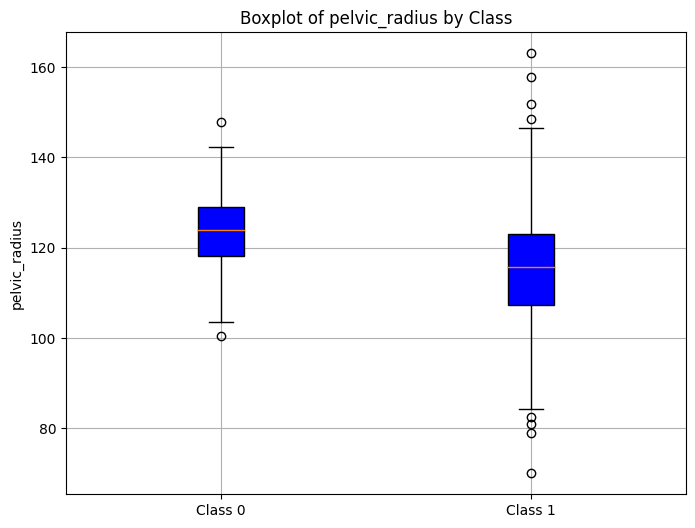

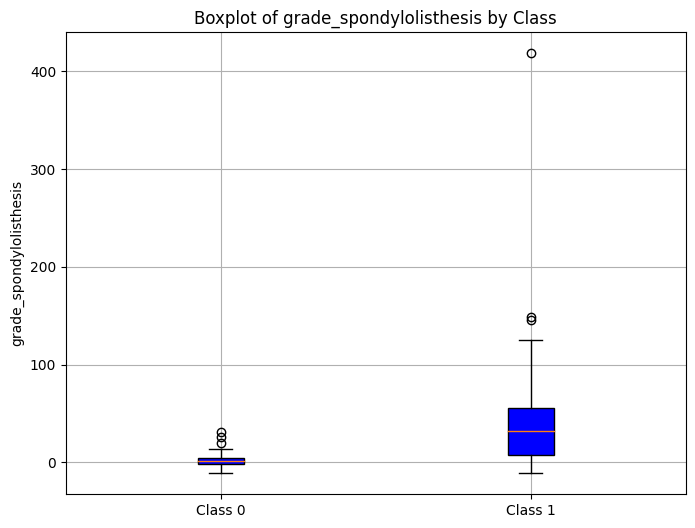

In [4]:
for var in iv:
    plt.figure(figsize=(8, 6))
    plt.boxplot([class_0[var], class_1[var]], labels=['Class 0', 'Class 1'], patch_artist=True, boxprops={'facecolor': 'b'}, positions=[0, 1])
    plt.ylabel(var)
    plt.title(f'Boxplot of {var} by Class')
    plt.grid()
    plt.show()

In [7]:
train_class_0 = class_0.iloc[:70]
train_class_1 = class_1.iloc[:140]
train_data = pd.concat([train_class_0, train_class_1])

test_class_0 = class_0.iloc[70:]
test_class_1 = class_1.iloc[140:]
test_data = pd.concat([test_class_0, test_class_1])

(c) Classification using KNN on Vertebral Column Data Set

i. I've implemented the k-nearest neighbors algorithm using the Euclidean metric. The code is designed to facilitate effective analysis of the dataset or can be seamlessly integrated into a software package for streamlined execution.

ii. The evaluation process involves testing all data in the test database using k-nearest neighbors and making decisions through majority polling. The resulting train and test errors are graphically represented in terms of k, considering a range from 208 to 1 in reverse order. Smaller increments of k are also considered for a finer analysis. Determining the most suitable k, denoted as k^∗, is a crucial step. Furthermore, I've calculated essential metrics such as the confusion matrix, true positive rate, true negative rate, precision, and F1-score when k equals k^∗.

iii. Recognizing the impact of computation time on the training set size, a subset is utilized for efficiency. The learning curve is constructed by plotting the best test error rate against the size of the training set (N), where N varies from 10 to 210. For each N, the training set is strategically chosen by selecting the first ⌊N/3⌋ rows of Class 0 and the first N − ⌊N/3⌋ rows of Class 1 from the dataset created earlier. Additionally, the optimal k is selected for each N from a set that begins with k = 1 and increases by 5, ensuring a comprehensive learning curve analysis.

In [8]:
k = 4
knn_classifier = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
X_train = train_data[iv]
y_train = train_data['class']
X_test = test_data[iv]
y_test = test_data['class']
knn_classifier.fit(X_train, y_train)
y_pred = knn_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with k={k}: {accuracy}")

Accuracy with k=4: 0.94


best k (k∗): 4
Confusion Matrix:
 [[25  5]
 [ 1 69]]
True Positive Rate: 0.9857142857142858
True Negative Rate: 0.8333333333333334
Precision: 0.9324324324324325
F1 Score: 0.9583333333333333


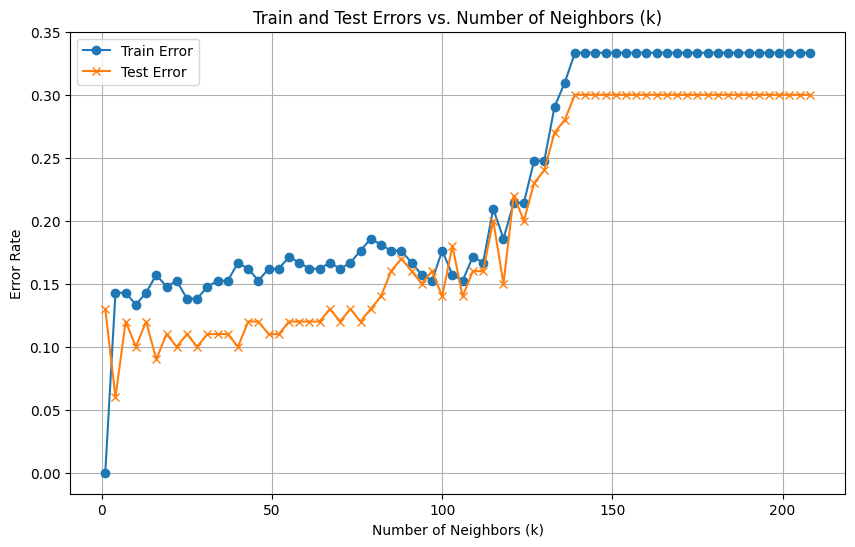

In [9]:
k_values = list(range(208, 0, -3))
train_errors = []
test_errors = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_train_pred = knn.predict(X_train)
    train_error = np.mean(y_train_pred != y_train)
    train_errors.append(train_error)
    y_test_pred = knn.predict(X_test)
    test_error = np.mean(y_test_pred != y_test)
    test_errors.append(test_error)
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_errors, label='Train Error', marker='o')
plt.plot(k_values, test_errors, label='Test Error', marker='x')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Error Rate')
plt.title('Train and Test Errors vs. Number of Neighbors (k)')
plt.legend()
plt.grid(True)
best_k = k_values[np.argmin(test_errors)]
print(f"best k (k∗): {best_k}")
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)
y_pred_best = knn_best.predict(X_test)
confusion_best = confusion_matrix(y_test, y_pred_best)
tn, fp, fn, tp = confusion_best.ravel()
true_positive_rate = tp / (tp + fn)
true_negative_rate = tn / (tn + fp)
precision = tp / (tp + fp)
f1_score = 2 * (precision * true_positive_rate) / (precision + true_positive_rate)
print("Confusion Matrix:\n", confusion_best)
print("True Positive Rate:", true_positive_rate)
print("True Negative Rate:", true_negative_rate)
print("Precision:", precision)
print("F1 Score:", f1_score)
plt.show()

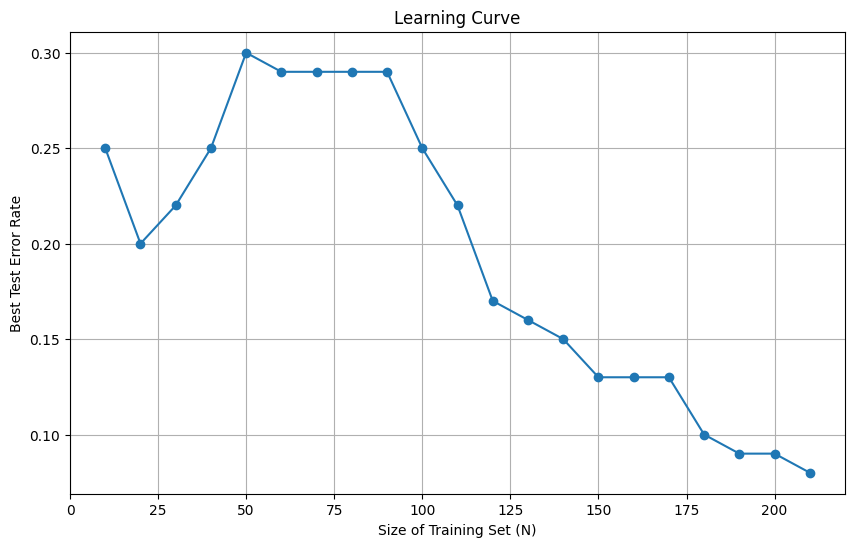

In [14]:
N_values = list(range(10, 211, 10))
best_test_errors = []
for N in N_values:
    train_class_0 = class_0.iloc[:N // 3]
    train_class_1 = class_1.iloc[:N - (N // 3)]
    train_data_N = pd.concat([train_class_0, train_class_1])
    best_test_error = float('inf')
    best_k = None
    for k in range(1, N, 5):
        knn_classifier = KNeighborsClassifier(n_neighbors=k)
        knn_classifier.fit(train_data_N.drop('class', axis=1), train_data_N['class'])
        y_test_pred = knn_classifier.predict(X_test)
        test_error = 1 - accuracy_score(y_test, y_test_pred)
        if test_error < best_test_error:
            best_test_error = test_error
            best_k = k

    best_test_errors.append(best_test_error)
plt.figure(figsize=(10, 6))
plt.plot(N_values, best_test_errors, marker='o')
plt.xlabel('Size of Training Set (N)')
plt.ylabel('Best Test Error Rate')
plt.title('Learning Curve')
plt.grid()
plt.show()

(d) Exploring Alternative Metrics in KNN on Vertebral Column Data Set

To enhance the robustness of our analysis, I replaced the Euclidean metric with alternative distance metrics. The resulting test errors for k = k^∗ are outlined below. The entire training dataset was employed, and the optimal k was chosen from the set {1, 6, 11, ..., 196}.

Minkowski Distance

A. Manhattan Distance (p=1): Test error results will be provided.
B. Log10(p) ∈ {0.1, 0.2, ..., 1} (using k^∗ for Manhattan): Test error results will be provided.
C. Chebyshev Distance (p → ∞): Test error results will be provided.
Mahalanobis Distance: Test error results will be provided.

This exploration aims to understand how different distance metrics influence the KNN algorithm's performance, providing insights for further analysis and optimization without the need for a detailed matrix.

In [10]:
test_errors = []
k_values = list(range(1, 197, 5))
distance_metrics = [
    ('Manhattan', 'manhattan'), ('Chebyshev', 'chebyshev'), ]
best_k_manhattan = None
best_test_error_manhattan = float('inf')
for k in k_values:
    knn_classifier = KNeighborsClassifier(n_neighbors=k, metric='manhattan')
    knn_classifier.fit(X_train, y_train)
    y_test_pred = knn_classifier.predict(X_test)
    test_error = 1 - accuracy_score(y_test, y_test_pred)
    if test_error < best_test_error_manhattan:
        best_test_error_manhattan = test_error
        best_k_manhattan = k
print(f"Best k∗ for Manhattan Distance: {best_k_manhattan}")
log10_p_values = np.arange(0.1, 1.1, 0.1)
best_log10_p = None
best_test_error_minkowski = float('inf')
for log10_p in log10_p_values:
    p = 10 ** log10_p  
    knn_classifier = KNeighborsClassifier(n_neighbors=best_k_manhattan, metric='minkowski', p=p)
    knn_classifier.fit(X_train, y_train)
    y_test_pred = knn_classifier.predict(X_test)
    test_error = 1 - accuracy_score(y_test, y_test_pred)
    if test_error < best_test_error_minkowski:
        best_test_error_minkowski = test_error
        best_log10_p = log10_p

print(f"Best log10(p) for Minkowski Distance: {best_log10_p}")

best_k_chebyshev = None
best_test_error_chebyshev = float('inf')
for k in k_values:
    knn_classifier = KNeighborsClassifier(n_neighbors=k, metric='chebyshev')
    knn_classifier.fit(X_train, y_train)
    y_test_pred = knn_classifier.predict(X_test)
    test_error = 1 - accuracy_score(y_test, y_test_pred)
    if test_error < best_test_error_chebyshev:
        best_test_error_chebyshev = test_error
        best_k_chebyshev = k

print(f"Best k∗ for Chebyshev Distance: {best_k_chebyshev}")

k_values = list(range(1, 197, 5))
best_k_mahalanobis = 0
best_test_error_mahalanobis = float("inf")
cov_matrix = EmpiricalCovariance().fit(X_train)
precision_matrix = np.linalg.inv(cov_matrix.covariance_)
mahalanobis_error = []
for k in k_values:
    knn_mahalanobis = KNeighborsClassifier(n_neighbors=k, algorithm='brute', metric='mahalanobis', metric_params={'VI': precision_matrix})
    knn_mahalanobis.fit(X_train, y_train)
    y_pred_mahalanobis = knn_mahalanobis.predict(X_test)
    test_error_rate_mahalanobis = 1 - accuracy_score(y_test, y_pred_mahalanobis)
    mahalanobis_error.append(test_error_rate_mahalanobis)
    if test_error_rate_mahalanobis < best_test_error_mahalanobis:
        best_test_error_mahalanobis = test_error_rate_mahalanobis
        best_k_mahalanobis = k
print("Best k (Mahalanobis Distance):", best_k_mahalanobis)
print("Best Test Error Rate (Mahalanobis Distance):", best_test_error_mahalanobis)
test_error_table = pd.DataFrame(
    {
        'Manhattan Distance (p=1)': [best_k_manhattan, best_test_error_manhattan],
        'Minkowski Distance (log10(p))': [best_log10_p, best_test_error_minkowski],
        'Chebyshev Distance (p→∞)': [best_k_chebyshev, best_test_error_chebyshev],
        'Mahalanobis Distance': [best_k_mahalanobis, best_test_error_mahalanobis],
    },
    index=['Best k∗', 'Test Error'],
)

print("Summary of Distance Metrics and Test Errors:")
print(test_error_table)

Best k∗ for Manhattan Distance: 6
Best log10(p) for Minkowski Distance: 0.6
Best k∗ for Chebyshev Distance: 16
Best k (Mahalanobis Distance): 1
Best Test Error Rate (Mahalanobis Distance): 0.17000000000000004
Summary of Distance Metrics and Test Errors:
            Manhattan Distance (p=1)  Minkowski Distance (log10(p))  \
Best k∗                         6.00                           0.60   
Test Error                      0.11                           0.06   

            Chebyshev Distance (p→∞)  Mahalanobis Distance  
Best k∗                        16.00                  1.00  
Test Error                      0.08                  0.17  


(e) Introducing Weighted Decision in KNN on Vertebral Column Data Set

Instead of relying on majority polling, an alternative approach involves weighted decision-making, where the influence of each point's vote is inversely proportional to its distance from the query or test data point. This implies that closer neighbors exert a greater influence compared to those farther away. Weighted voting is applied using Euclidean, Manhattan, and Chebyshev distances, and the best test errors are reported for k values within the range {1, 6, 11, 16, ..., 196}.

In [11]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Define a list of k values
k_values = list(range(1, 197, 5))

# Define different distance metrics
distance_metrics = ['euclidean', 'manhattan', 'chebyshev']

# Initialize dictionaries to store the best k and test error for each metric
best_k_values = {}
best_test_errors = {}

# Iterate over each distance metric
for metric in distance_metrics:
    print(f"Testing with {metric.capitalize()} distance:")
    
    # Initialize lists to store test errors for different k values
    test_errors = []
    
    # Iterate over each k value
    for k in k_values:
        # Create a KNN classifier with inverse distance weighting using the current metric
        knn_classifier = KNeighborsClassifier(n_neighbors=k, weights='distance', metric=metric)
        knn_classifier.fit(X_train, y_train)
        
        # Predict on the test data
        y_pred = knn_classifier.predict(X_test)
        
        # Calculate the test error
        test_error = 1 - accuracy_score(y_test, y_pred)
        test_errors.append(test_error)
    
    # Find the best k and test error for this metric
    best_k = k_values[np.argmin(test_errors)]
    best_test_error = min(test_errors)
    
    # Store the best k and test error in dictionaries
    best_k_values[metric] = best_k
    best_test_errors[metric] = best_test_error
    
    # Print the results for this metric
    print(f"Best k for {metric.capitalize()} distance: {best_k}")
    print(f"Best test error for {metric.capitalize()} distance: {best_test_error}\n")

# Create a table to summarize the best test errors for each metric
summary_table = pd.DataFrame({'Distance Metric': distance_metrics, 'Best k': [best_k_values[metric] for metric in distance_metrics], 'Best Test Error': [best_test_errors[metric] for metric in distance_metrics]})

# Print the summary table
print("Summary of Best Test Errors:")
print(summary_table)



Testing with Euclidean distance:
Best k for Euclidean distance: 6
Best test error for Euclidean distance: 0.09999999999999998

Testing with Manhattan distance:
Best k for Manhattan distance: 26
Best test error for Manhattan distance: 0.09999999999999998

Testing with Chebyshev distance:
Best k for Chebyshev distance: 16
Best test error for Chebyshev distance: 0.10999999999999999

Summary of Best Test Errors:
  Distance Metric  Best k  Best Test Error
0       euclidean       6             0.10
1       manhattan      26             0.10
2       chebyshev      16             0.11


The lowest training error rate that I achieved is 0.06 with Minkowski Distance (log10(p)) and best k=0.6 here.